library import

In [1]:
import os #importando biblioteca de organização de arquivos
import joblib #convertendo imagens em valores numéricos .gz
import numpy as np #estruturação de dados
import matplotlib.pyplot as plt #plotagem de gráficos 
import matplotlib.image as mpimg #plotagem de imagens
# from util import meus_uteis, timeProcess
from PIL import Image
from util import meus_uteis, timeProcess
import pandas as pd




Organizing images into folders/ 44 brightfield images of the Huh7 lineage are being saved

In [62]:
novas_imagens = '/da/data/Image_huh7' #diretório
img_key = 3 #Chave da primeira imagem

lista_novas_img = os.listdir(novas_imagens) #listando as figuras salvas no diretório
#len(lista_novas_img)
lista_novas_img

['Figura 10_rot830_campo_claro_ajuste_huh7.png',
 'Figura 11_rot802_campo_claro_ajuste_huh7.png',
 'Figura 12_rot721_campo_claro_ajuste_huh7.png',
 'Figura 13_rot756_campo_claro_ajuste_huh7.png',
 'Figura 14_rot716_campo_claro_ajuste_huh7.png',
 'Figura 15_rot674_campo_claro_ajuste_huh7.png',
 'Figura 16_rot698_campo_claro_ajuste_huh7.png',
 'Figura 17_rot694_campo_claro_ajuste_huh7.png',
 'Figura 18_rot745_campo_claro_ajuste_huh7.png',
 'Figura 19_rot750_campo_claro_ajuste_huh7.png',
 'Figura 1_rot1383_campo_claro_ajuste_huh7.png',
 'Figura 20_rot705_campo_claro_ajuste_huh7.png',
 'Figura 21_rot726_campo_claro_ajuste_huh7.png',
 'Figura 22_rot687_campo_claro_ajuste_huh7.png',
 'Figura 23_rot704_campo_claro_ajuste_huh7.png',
 'Figura 24_rot683_campo_claro_ajuste_huh7.png',
 'Figura 25_rot684_campo_claro_ajuste_huh7.png',
 'Figura 26_rot686_campo_claro_ajuste_huh7.png',
 'Figura 27_rot1216_campo_claro_ajuste_huh7.png',
 'Figura 28_rot1325_campo_claro_ajuste_huh7.png',
 'Figura 29_rot918

View images in 200x200 size

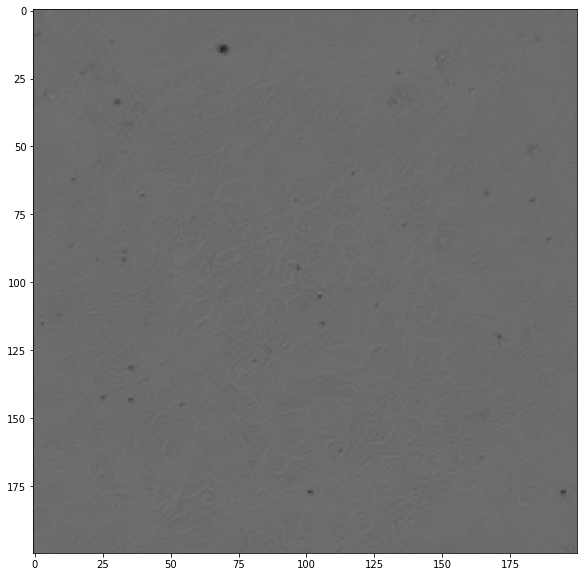

In [9]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

### y = Labels (44)

In [10]:
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img] #cortando informações da imagem
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
len(y_rotulo_imagem)
# len(y_rotulo_imagem) #verificando o numero de rótulos corresponde o numero de imagens
# y_rotulo_imagem

44

In [ ]:
#testando se cortou apenas os valores de rótulo
#y_rotulo_imagem

Formatting all images that are saved in the directory into an array

In [11]:
lista_imagens_camp_claro = [] #lista vazia onde vai ser armazenado os dados
for file in lista_novas_img[:44]:  #laço pra salvar todas as imagens
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test) #abrir a imagem
    img = img.resize(resize_img) #formatando em 200x200
    img = np.asarray(img)[:,:,:3] #formatando em array
    lista_imagens_camp_claro.append(img)  #adicionando cada imagem
np.asarray(lista_imagens_camp_claro).shape #verificando quantas imagens foram salvas em qual tamnho e camadas

(44, 200, 200, 3)

### y = label (88 - doubled)

In [12]:
#dobrando o numero de rótulos - mesmo que a imagem esteja invertida, ela possui mesmo rótulo
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

88

## Saving inverted images from left to right

In [13]:
for file in lista_novas_img[:44]:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  """


(88, 200, 200, 3)

In [ ]:
# #conferindo a imagem
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*1)])
# plt.show()

## Saving inverted images from bottom to top

Salvando mais 71 imagens invertendo a orientação.

### y = rótulo (213 - dobrou)

In [14]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

132

In [15]:
for file in lista_novas_img[:44]:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  """


(132, 200, 200, 3)

In [16]:
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*2)])
# plt.show()

### Salvando as imagens invertidas de cima pra baixo

### y = rótulo (284 - dobrou)

In [17]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

176

In [18]:
for file in lista_novas_img[:44]:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)    
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  


(176, 200, 200, 3)

In [19]:
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*3)])
# plt.show()

In [20]:
# lista_imagens_camp_claro

In [23]:
#data = timeProcess()[1]
#joblib.dump(np.asarray(lista_imagens_camp_claro), '/usr/src/myapp/results//lista_img_camp_clar_100_resized_regressao_huh7'+data+'.gz')

['/usr/src/myapp/results//lista_img_camp_clar_100_resized_regressao_huh72022-8-2.gz']

In [24]:
#joblib.dump(np.asarray(y_rotulo_soma), '/usr/src/myapp/results//lista_rotulo_camp_clar_100_resized_regressao_huh7'+data+'.gz')


['/usr/src/myapp/results//lista_rotulo_camp_clar_100_resized_regressao_huh72022-8-2.gz']

## Cropping 75% of the image/enlarging the image bank

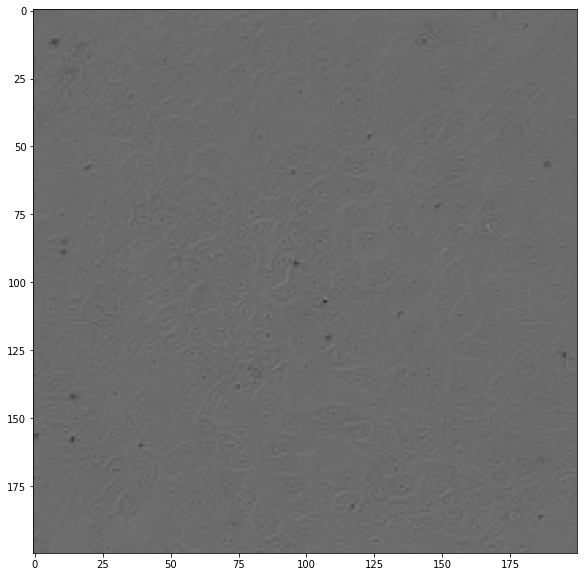

In [25]:
box = (135,135,945,945)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [26]:
from math import ceil


In [30]:
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img]
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = [ceil(n-(n*0.25)) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

44

In [31]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(44, 200, 200, 3)

## crop images 75% resized and rotating from left to right

In [32]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

88

In [33]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  


(88, 200, 200, 3)

## crop image 75% resized and flipping from bottom to top

In [34]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

132

In [35]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  


(132, 200, 200, 3)

## Saving crop 75% resized and flip top bottom image

In [36]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

176

In [37]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  import sys


(176, 200, 200, 3)

In [38]:
#data = timeProcess()[1]
#joblib.dump(np.asarray(lista_imagens_camp_claro), '/usr/src/myapp/results/lista_img_camp_clar_75_resized_regressao_HUH7'+data+'.gz')

['/usr/src/myapp/results//lista_img_camp_clar_75_resized_regressao_HUH72022-8-2.gz']

In [39]:
#joblib.dump(np.asarray(y_rotulo_soma), '/usr/src/myapp/results/lista_rotulo_camp_clar_75_resized_regressao_HUH7'+data+'.gz')


['/usr/src/myapp/results//lista_rotulo_camp_clar_75_resized_regressao_HUH72022-8-2.gz']

## Crop 50% of the image

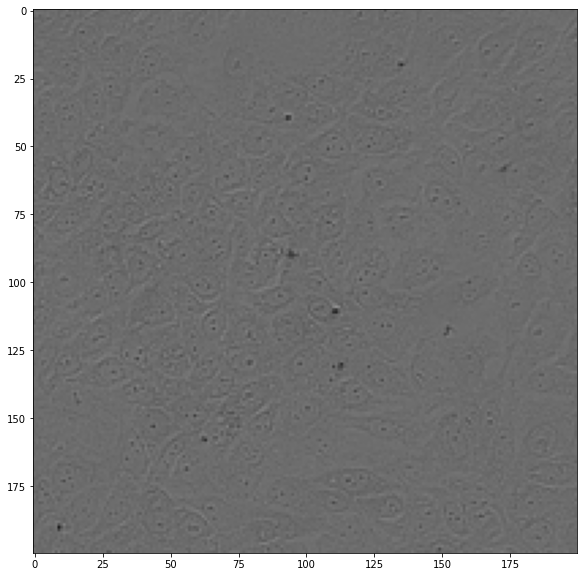

In [40]:
box = (270,270,810,810)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [41]:
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img]
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = [ceil(n/2) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

44

In [42]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(44, 200, 200, 3)

## Saving crop 50% resized and turn image left right

In [43]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

88

In [44]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  


(88, 200, 200, 3)

## Saving 50% resized crop and flip top bottom image

In [45]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

132

In [46]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  


(132, 200, 200, 3)

## Saving crop 75% resized and flip top bottom image

In [47]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

176

In [48]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  import sys


(176, 200, 200, 3)

In [49]:
#data = timeProcess()[1]
#joblib.dump(np.asarray(lista_imagens_camp_claro), '/usr/src/myapp/results//lista_img_camp_clar_50_resized_regressao_HUH7'+data+'.gz')

['/usr/src/myapp/results//lista_img_camp_clar_50_resized_regressao_HUH72022-8-2.gz']

In [50]:
#joblib.dump(np.asarray(y_rotulo_soma), '/usr/src/myapp/results//lista_rotulo_camp_clar_50_resized_regressao_HUH7'+data+'.gz')


['/usr/src/myapp/results//lista_rotulo_camp_clar_50_resized_regressao_HUH72022-8-2.gz']

## Crop 25% of the image

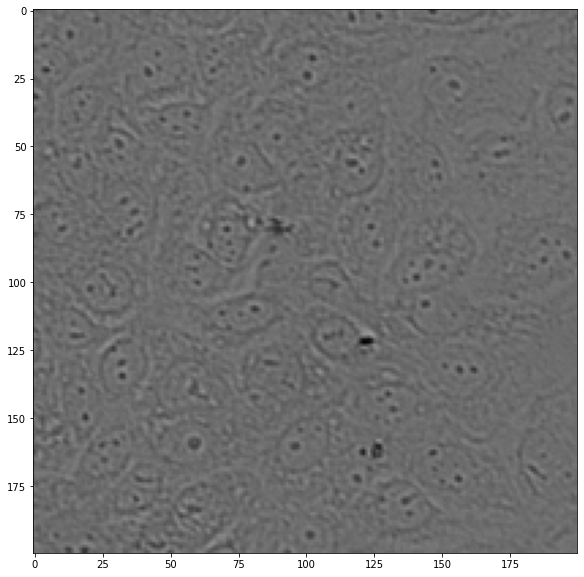

In [51]:
box = (405,405,675,675)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [52]:
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img]
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = [ceil(n-(n*0.75)) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

44

In [53]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(44, 200, 200, 3)

## Saving crop 25% resized and turn image left right

In [54]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

88

In [55]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  


(88, 200, 200, 3)

## Saving crop 25% resized and flip top bottom image

In [56]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

132

In [57]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  


(132, 200, 200, 3)

## Saving crop 25% resized and flip top bottom image

In [58]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

176

In [59]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  import sys


(176, 200, 200, 3)

In [60]:
#data = timeProcess()[1]
#joblib.dump(np.asarray(lista_imagens_camp_claro), '/usr/src/myapp/results//lista_img_camp_clar_25_resized_regressao_HUH7'+data+'.gz')

['/usr/src/myapp/results//lista_img_camp_clar_25_resized_regressao_HUH72022-8-2.gz']

In [61]:
#joblib.dump(np.asarray(y_rotulo_soma), '/usr/src/myapp/results//lista_rotulo_camp_clar_25_resized_regressao_HUH7'+data+'.gz')


['/usr/src/myapp/results//lista_rotulo_camp_clar_25_resized_regressao_HUH72022-8-2.gz']